<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Quiz 2 - Solutions

This notebook contains 5 parts. You are to fill in this quiz with your answers, taking special care to follow the directions _exactly_.

To **submit** your quiz, drop your completed notebook in the file uploader in the provided Google Form.

### Quiz Information:
- This is an "open book" quiz - you may use any resources! This includes Jupyter notebooks, Google, StackOverflow, and your notes. ANY RESOURCE YOU USE MUST BE CITED (comment your code with links, which lesson you got the inspiration from, etc.) and failure to cite resources you use will be considered plagiarism. 
- You may NOT work with anyone else on this quiz (your classmates, your instructor, etc.).
- You will have one hour to take this quiz.

## Part 1: Getting the data
The dataset provided in this repository (`./data/concrete.csv`) consists of various amounts of different components used to create concrete and the concrete's [compressive strength](https://www.aboutcivil.org/compressive-strength-of-concrete.html). A data dictionary for this dataset can be found in the README.

**Read in the data and display the first 5 rows.**

### Rubric (2pts total):

* +1 : Correctly read in the csv and save it as a variable
* +1 : Successfully displayed the first 5 rows of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
concrete = pd.read_csv('./data/concrete.csv')

In [3]:
concrete.head()

,Unnamed: 0,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,2,332.5,142.5,0.0,228.0,NaN,932.0,594.0,270,40.27
3,3,332.5,142.5,0.0,228.0,NaN,932.0,594.0,365,41.05
4,4,198.6,132.4,0.0,192.0,NaN,978.4,825.5,360,44.30


## Part 2: Data Cleaning

There are a few issues with this dataset. To help you identify and fix these issues, you are told:
- The `Unnamed: 0` column should not be a part of this dataset.
- Any null values in this datset are clerical errors. They should all be 0's.
- All columns in this dataset should be numeric.

**Please clean up the dataset.**

### Rubric (3pts total)
* +1 : Removed the Unnamed: 0 column
* +1 : Replaced NaNs with 0's
* +1 : Converted the Age column to int or float

In [4]:
# delete Unnamed: 0 column
concrete.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
# replace nans with 0's in the Superplasticizer column
concrete = concrete.fillna(0)

In [6]:
# convert age column to int or float
concrete['Age'] = concrete['Age'].str.replace('\'', '').astype(int)

## Part 3: EDA

You are asked to give the following to the hiring manager:
- Descriptive statistics of the Water column
- A scatterplot of Coarse Aggregate compared to Fine Aggregate colored purple with a title and axis labels

**Please display these.**

### Rubric (3pts total):

* +1 : Displayed the summary statistics of the water column
* +1 : Successfully displayed a scatterplot of the correct columns
* +1 : For coloring the scatterplot purple and adding a title and axis labels

In [7]:
# summary statistics
concrete['Water'].describe()

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: Water, dtype: float64

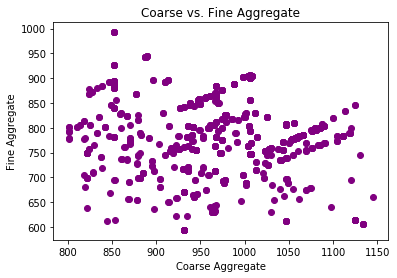

In [8]:
# scatterplot
plt.scatter(concrete['Coarse Aggregate'],
            concrete['Fine Aggregate'],
            color = 'purple')
plt.title('Coarse vs. Fine Aggregate')
plt.xlabel('Coarse Aggregate')
plt.ylabel('Fine Aggregate');

## Part 4: Modeling

**Fit a linear regression model to predict the concrete compressive strength.** 
* Please use a random state of `2020` when splitting your data
* Use 80% of the dataset for training and the other 20% for testing
* Print out and interpret the testing R<sup>2</sup>.

### Rubric (6pts total):

* +1 : For splitting data into correct X and y
* +1 : For using the correct random state
* +1 : For using an 80/20 split for training/testing
* +1 : For correctly instantiating and fitting a linear regression
* +1 : For calculating the r2 of the testing set
* +1 : For correctly interpreting the r2 of the testing set

In [9]:
# split data into X and y
X = concrete.drop(columns = 'Concrete compressive strength')
y = concrete['Concrete compressive strength']

# use 80/20% training/testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2020)

In [10]:
# Linear regression
lm = LinearRegression()

lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.6187699710545507

In [11]:
# print out testing r2
lm.score(X_test, y_test)

0.5979187032701263

In [12]:
# interpret the testing r2:
# 59.8% of the variability in concrete compressive strength 
# can be explained by the X's in our model

## Part 5: Interpretation

The firm is especially interested in learning more about the effects of [superplasticizer](https://en.wikipedia.org/wiki/Superplasticizer).

**They ask you what effect the Superplasticizer has on the concrete compressive strength. How would you respond? Be as specific as possible.**

### Rubric (3pts total):

* +1 : For correct interpretation of the coefficient
* +1 : For using specific units (kg, MPa)
* +1 : For adding a phrase along the lines of "holding all else constant"

In [13]:
[f'{X.columns[i]}: {lm.coef_[i]}' for i in range(0, len(X.columns))]

['Cement: 0.11671770732637801',
 'Blast Furnace Slag: 0.0995515078296956',
 'Fly Ash: 0.08601209239160536',
 'Water: -0.1746734016172198',
 'Superplasticizer: 0.2582185644472001',
 'Coarse Aggregate: 0.010311008197778646',
 'Fine Aggregate: 0.014274599336305295',
 'Age: 0.11121745508614453']

> Holding all else constant, for every one kg increase in superplasticizer, we expect the concrete compressive strength to increase by about 0.258 MPa.